In [1]:
from api_keys import gkey
import numpy as np
import pandas as pd
import requests
from us import states
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [2]:
#states list for url
states_list = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 

          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 

          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 

          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 

          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [3]:
#testing 123
# response=requests.get(f'http://api.eia.gov/series/?api_key={gkey}&series_id=SEDS.REPRB.CA.A')
# cali = response.json()

In [4]:
# help_me = dict(cali['series'][0]['data'][0:11])
# help_me.values()

In [5]:
states_df = pd.DataFrame({})

In [6]:
#api call. This is for overall renewable energy production per billion Btu
for state in states_list:
    url=(f'http://api.eia.gov/series/?api_key={gkey}&series_id=SEDS.REPRB.{state}.A')
    response=requests.get(url)
    all_states = response.json()
    states_data = dict(all_states['series'][0]['data'][0:11])
    states_df[state]= states_data.values()
states_df

,AL,AK,AZ,AR,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
0,276734,24117,154992,125039,1023623,154200,38245,1603,3384,249373,...,235220,196518,903003,50330,41498,158108,938680,45435,224400,51450
1,254958,23608,148625,115289,1120569,150632,33502,1316,3268,238863,...,225523,176435,811457,53277,37830,138903,950948,41696,216737,55900
2,230731,25120,139231,115408,932768,147499,34222,1107,3102,223467,...,226419,159791,714190,36544,35570,139965,930646,39606,219451,54545
3,258941,23807,129266,117808,738814,123965,33236,824,3517,223817,...,217615,189390,586962,23993,38785,138537,872303,37954,218338,49730
4,270743,19790,120149,119813,749645,125648,32677,344,4224,231370,...,222713,186908,547503,22235,32832,136734,940937,50020,214934,54028
5,313665,18629,98958,121310,744983,116979,30046,305,3795,234142,...,209519,217500,500601,17178,33314,118391,928038,53863,204782,52908
6,242204,17796,98806,114237,705086,102686,26910,285,3581,223034,...,217925,173295,469283,21019,26308,102372,1019834,44878,197963,53505
7,255849,16078,113360,124987,838547,104147,30760,290,4172,227710,...,237549,184814,456427,24387,30555,104936,1063525,47220,207867,60191
8,242243,16965,85935,126235,715878,82190,30357,114,3838,230259,...,214683,168515,397186,17678,32420,110820,822184,45978,208904,44696
9,264530,15685,80898,125695,647227,80116,29529,49,3577,213645,...,179384,179235,304805,15951,31572,115242,832840,45121,171839,34009


In [7]:
states_df=states_df.transpose()

In [8]:
states_df = states_df.rename(columns=
                 {0:'2018',
                  1:'2017',
                  2:'2016',
                  3:'2015',
                  4:'2014',
                  5:'2013',
                  6:'2012',
                  7:'2011',
                  8:'2010',
                  9:'2009',
                  10:'2008'})

In [9]:
states_df = states_df[states_df.columns[::-1]]

##Overall energy production csv
states_df.to_csv("../input_data/AllEnergyProduced.csv")

In [10]:
states_df.to_csv("renewable_production_bill_btu.csv")

In [11]:
renewable_energy_df = pd.DataFrame(states_df.mean(axis = 1))
avg_df_bot = renewable_energy_df.sort_values(0)
bottom_five_states = avg_df_bot.head(5)
print(bottom_five_states)

               0
DC    572.909091
DE   3582.727273
RI   4196.818182
AK  19500.727273
HI  21342.090909


In [12]:
avg_df_top = renewable_energy_df.sort_values(0, ascending = False)
top_five_states = avg_df_top.head(5)
print(top_five_states)

                0
WA  925651.363636
CA  801967.181818
IA  686434.272727
TX  545308.363636
OR  461926.454545


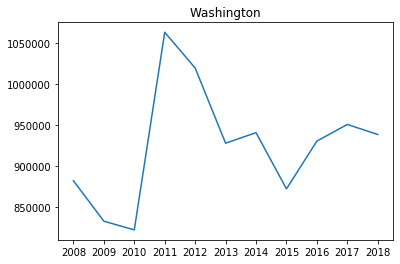

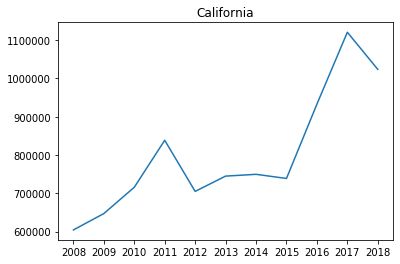

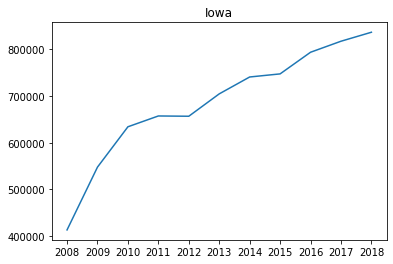

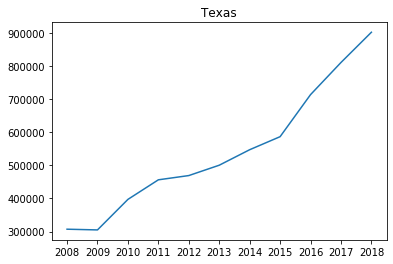

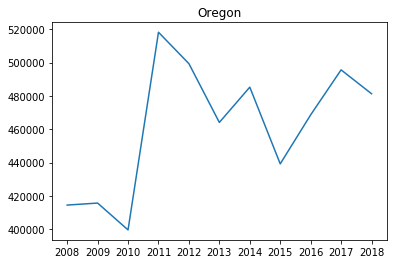

In [16]:
#ploting renewable energy (all sources) over time
plt.plot(states_df.iloc[-4])
plt.title("Washington")
plt.show()
plt.plot(states_df.iloc[4])
plt.title("California")
plt.show()
plt.plot(states_df.iloc[15])
plt.title("Iowa")
plt.show()
plt.plot(states_df.iloc[-8])
plt.title("Texas")
plt.show()
plt.plot(states_df.iloc[-14])
plt.title("Oregon")
plt.show()

In [17]:
#I put in 2017 for the change date because that is what we have for emissions data but can update easily
for row in states_df.iterrows():
    change_production = states_df["2017"]-states_df["2008"]
change_production = change_production.sort_values(0, ascending=False)
change_production.head(5)

CA    516070
TX    504482
IA    404128
OK    192704
NE    188627
dtype: int32

In [ ]:
plt.plot(states_df.iloc[36])
plt.title("Oklahoma")
plt.show()
plt.plot(states_df.iloc[27])
plt.title("Nebraska")
plt.show()
plt.plot(states_df.iloc[35])
plt.title("Ohio")
plt.show()

In [16]:
states_df.reset_index()

,index,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,AL,234001,264530,242243,255849,242204,313665,270743,258941,230731,254958,276734
1,AK,12913,15685,16965,16078,17796,18629,19790,23807,25120,23608,24117
2,AZ,96752,80898,85935,113360,98806,98958,120149,129266,139231,148625,154992
3,AR,124882,125695,126235,124987,114237,121310,119813,117808,115408,115289,125039
4,CA,604499,647227,715878,838547,705086,744983,749645,738814,932768,1120569,1023623
5,CO,80070,80116,82190,104147,102686,116979,125648,123965,147499,150632,154200
6,CT,26358,29529,30357,30760,26910,30046,32677,33236,34222,33502,38245
7,DC,65,49,114,290,285,305,344,824,1107,1316,1603
8,DE,2952,3577,3838,4172,3581,3795,4224,3517,3102,3268,3384
9,FL,195232,213645,230259,227710,223034,234142,231370,223817,223467,238863,249373


In [17]:
#data for state solar energy consumption over time
consumption_df=pd.DataFrame({})

In [18]:
for state in states_list:
    url=(f'http://api.eia.gov/series/?api_key={gkey}&series_id=SEDS.SOTCB.{state}.A')
    response2=requests.get(url)
    all_states_cons = response2.json()
    states_data_cons = dict(all_states_cons['series'][0]['data'][0:11])
    consumption_df[state]= states_data_cons.values()

In [19]:
consumption_df=consumption_df.transpose()

In [20]:
states_df.reset_index()


,index,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,AL,234001,264530,242243,255849,242204,313665,270743,258941,230731,254958,276734
1,AK,12913,15685,16965,16078,17796,18629,19790,23807,25120,23608,24117
2,AZ,96752,80898,85935,113360,98806,98958,120149,129266,139231,148625,154992
3,AR,124882,125695,126235,124987,114237,121310,119813,117808,115408,115289,125039
4,CA,604499,647227,715878,838547,705086,744983,749645,738814,932768,1120569,1023623
5,CO,80070,80116,82190,104147,102686,116979,125648,123965,147499,150632,154200
6,CT,26358,29529,30357,30760,26910,30046,32677,33236,34222,33502,38245
7,DC,65,49,114,290,285,305,344,824,1107,1316,1603
8,DE,2952,3577,3838,4172,3581,3795,4224,3517,3102,3268,3384
9,FL,195232,213645,230259,227710,223034,234142,231370,223817,223467,238863,249373


In [21]:
#data for state solar energy consumption over time
consumption_df=pd.DataFrame({})

In [22]:
for state in states_list:
    url=(f'http://api.eia.gov/series/?api_key={gkey}&series_id=SEDS.SOTCB.{state}.A')
    response2=requests.get(url)
    all_states_cons = response2.json()
    states_data_cons = dict(all_states_cons['series'][0]['data'][0:11])
    consumption_df[state]= states_data_cons.values()

In [23]:
consumption_df=consumption_df.transpose()

In [24]:
consumption_df = consumption_df.rename(columns=
                 {0:'2018',
                  1:'2017',
                  2:'2016',
                  3:'2015',
                  4:'2014',
                  5:'2013',
                  6:'2012',
                  7:'2011',
                  8:'2010',
                  9:'2009',
                  10:'2008'})

consumption_df

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
AL,3425,1812,431,101,100,97,78,71,68,62,64
AK,28,20,14,3,3,3,3,3,3,3,2
AZ,70800,66326,52862,48236,43572,31405,18096,7604,4518,3445,3112
AR,2118,442,372,124,111,108,100,85,80,59,53
CA,381733,340408,267580,211876,156494,84832,53911,41816,36006,31297,29985
CO,15338,13974,9509,6271,6046,5186,3886,2865,1808,1148,819
CT,6486,5089,4130,2954,2241,1601,1295,1189,1137,1062,929
DC,651,481,295,304,292,253,240,203,80,22,20
DE,1492,1354,1133,1230,1189,1001,607,383,125,85,50
FL,53528,38265,30909,30189,29805,28428,27441,25868,24638,23273,23615


In [25]:
consumption_df = consumption_df[consumption_df.columns[::-1]]
consumption_df.to_csv("../input_data/consumption.csv")

In [26]:
energy_consumption_df = pd.DataFrame(consumption_df.mean(axis = 1))
avg_df_bot5 = energy_consumption_df.sort_values(0)
bottom_five = avg_df_bot5.head(5)
print(bottom_five)

            0
ND   5.818182
AK   7.727273
SD  11.454545
WY  23.272727
WV  81.818182


In [27]:
avg_top5 = energy_consumption_df.sort_values(0, ascending = False)
top_five = avg_top5.head(5)
print(top_five)

                0
CA  148721.636364
AZ   31816.000000
FL   30541.727273
NV   16617.454545
NC   15441.181818


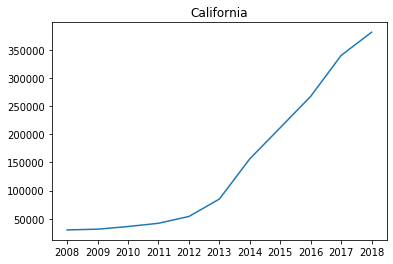

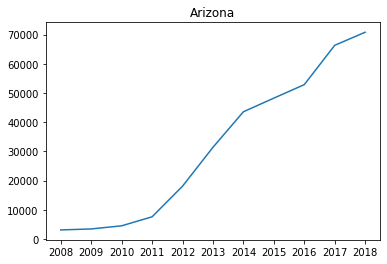

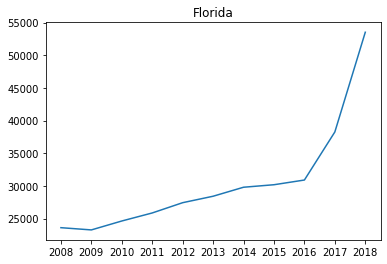

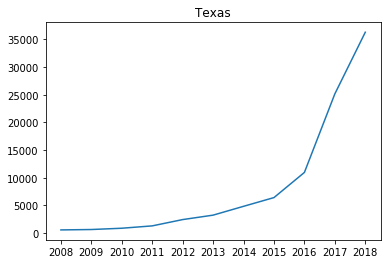

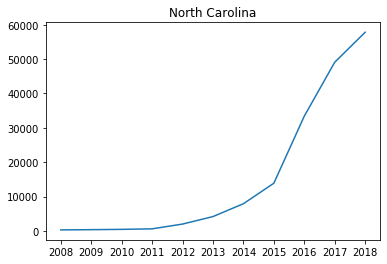

In [28]:
#ploting solar energy comsumption over time top 5
plt.plot(consumption_df.iloc[4])
plt.title("California")
plt.show()
plt.plot(consumption_df.iloc[2])
plt.title("Arizona")
plt.show()
plt.plot(consumption_df.iloc[9])
plt.title("Florida")
plt.show()
plt.plot(consumption_df.iloc[43])
plt.title("Texas")
plt.show()
plt.plot(consumption_df.iloc[33])
plt.title("North Carolina")
plt.show()

In [29]:
consumption_df

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
AL,64,62,68,71,78,97,100,101,431,1812,3425
AK,2,3,3,3,3,3,3,3,14,20,28
AZ,3112,3445,4518,7604,18096,31405,43572,48236,52862,66326,70800
AR,53,59,80,85,100,108,111,124,372,442,2118
CA,29985,31297,36006,41816,53911,84832,156494,211876,267580,340408,381733
CO,819,1148,1808,2865,3886,5186,6046,6271,9509,13974,15338
CT,929,1062,1137,1189,1295,1601,2241,2954,4130,5089,6486
DC,20,22,80,203,240,253,292,304,295,481,651
DE,50,85,125,383,607,1001,1189,1230,1133,1354,1492
FL,23615,23273,24638,25868,27441,28428,29805,30189,30909,38265,53528


In [30]:
renewable_df = pd.DataFrame({})

In [31]:
# renewable consumption over time in billion btu
for state in states_list:
    url=(f'http://api.eia.gov/series/?api_key={gkey}&series_id=SEDS.RETCB.{state}.A')
    response3=requests.get(url)
    renewable_cons = response3.json()
    renewable_data_cons = dict(renewable_cons['series'][0]['data'][0:11])
    renewable_df[state]= renewable_data_cons.values()

In [32]:
renewable_df=renewable_df.transpose()

In [33]:
renewable_df = renewable_df.rename(columns=
                 {0:'2018',
                  1:'2017',
                  2:'2016',
                  3:'2015',
                  4:'2014',
                  5:'2013',
                  6:'2012',
                  7:'2011',
                  8:'2010',
                  9:'2009',
                  10:'2008'})

In [34]:
renewable_df = renewable_df[renewable_df.columns[::-1]]

In [35]:
renewable_df

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
AL,237856,274392,266140,279972,265964,336862,293899,284415,259532,281538,298413
AK,13126,15912,17148,16702,17831,18931,22762,23828,26226,24438,24960
AZ,111992,96274,101344,129780,114962,119660,139783,149186,162312,171736,178463
AR,126307,130887,138625,135135,125379,132369,131627,129281,127818,120247,123771
CA,680732,726123,837498,947812,811515,859435,865005,863477,1060607,1251196,1154499
CO,77362,78330,81844,107003,107298,121965,130630,132628,157964,160765,164632
CT,36462,41681,43544,43378,38997,42943,45474,46769,47844,47376,50352
DC,565,620,1123,1310,1094,1175,1313,1831,2193,2257,2664
DE,5789,6640,7755,7862,7140,7610,8064,7745,7594,7912,8047
FL,242565,272937,289754,288653,287384,301818,298060,293815,290072,308818,317519


In [36]:
renewable_df.to_csv("RenewableConsumption.csv")